In [1]:
import pandas as pd

df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## 1) How many unique Countries Data we're having in the dataset?

In [5]:
df['Country Name'].nunique()

256

## 2) How many years of Data we're having for India

In [8]:
df_pr = df[df['Country Name'] == 'India']
df_pr['Year'].max() - df_pr['Year'].min()

56

## 3) Whats the world GDP in 1969?

In [12]:
df[df['Year'] == 1969]['Value'].sum()

19577201579296.54

## 4) Whats the % of GDP growth of India in Year 1994 (as compare to 1993)?

In [17]:
df_pr = df[df['Country Name'] == 'India']
prev = df_pr[df_pr['Year'] == 1993]['Value'].iloc[0]  # Get the value for 1993
cur = df_pr[df_pr['Year'] == 1994]['Value'].iloc[0]  # Get the value for 1994
gdp_change = ((cur - prev) / prev) * 100
gdp_change

17.178748210146075

# Tasks

### 1) Find GDP Growth of India from 1960 - 2016

In [18]:
df_pr = df[df['Country Name'] == 'India']
prev = df_pr[df_pr['Year'] == 1960]['Value'].iloc[0]  # Get the value for 1993
cur = df_pr[df_pr['Year'] == 2016]['Value'].iloc[0]  # Get the value for 1994
gdp_change = ((cur - prev) / prev) * 100
gdp_change

6096.072762594173

### 2) Create a new columns named as GDP which shows the GDP growth of each country for that year

In [21]:
df_pr = df[df['Country Name'] == 'India']
data = df_pr.values

gdp_change = [0]

for i in range(1,len(data)):

    prev = data[i-1][3]
    cur = data[i][3]

    gdp_change.append(round(((cur - prev) / prev)*100,2))

df_pr.assign(GDP = gdp_change).head()

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64


### 3) Create a graph of GDP Growth of India from 1960 - 2016

<Axes: title={'center': 'GDP Growth of India from 1960 - 2016'}, xlabel='Years', ylabel='GDP'>

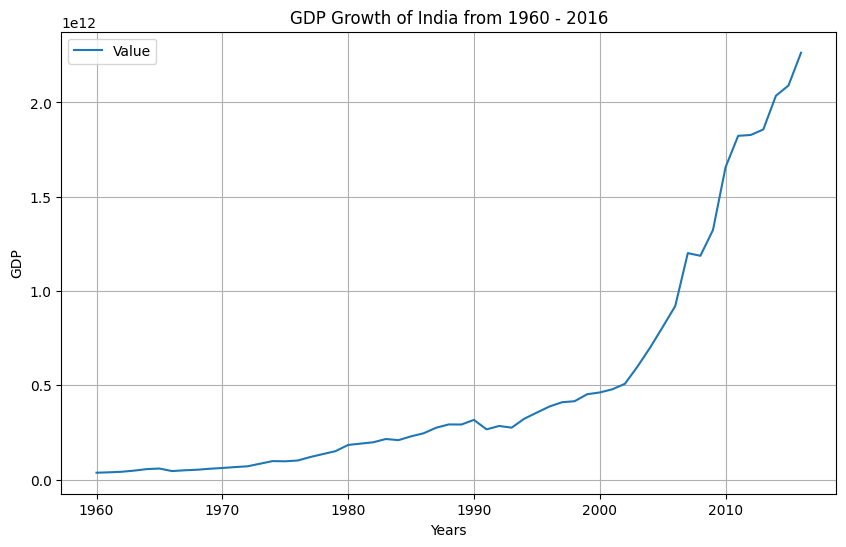

In [19]:
df[df['Country Name'] == 'India'].plot(kind = 'line',
                                       x = 'Year',
                                       y = 'Value',
                                       xlabel = 'Years',
                                       ylabel = 'GDP',
                                       title = 'GDP Growth of India from 1960 - 2016',
                                       grid = True,
                                       figsize = (10, 6))